In [100]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [101]:
data=pd.read_csv('D:/ML_practice/Diabetis_diagnose_LogisticReg/framingham.csv')

In [102]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [103]:
data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [104]:
data[data.isna().any(axis=1)].head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
14,0,39,2.0,1,9.0,0.0,0,0,0,226.0,114.0,64.0,22.35,85.0,NaN,0
21,0,43,1.0,0,0.0,0.0,0,0,0,185.0,123.5,77.5,29.89,70.0,NaN,0
26,0,60,1.0,0,0.0,0.0,0,0,0,260.0,110.0,72.5,26.59,65.0,NaN,0
33,1,61,NaN,1,5.0,0.0,0,0,0,175.0,134.0,82.5,18.59,72.0,75.0,1
36,1,56,NaN,0,0.0,0.0,0,0,0,257.0,153.5,102.0,28.09,72.0,75.0,0
42,0,52,1.0,0,0.0,1.0,0,1,0,NaN,148.0,92.0,25.09,70.0,NaN,1
49,1,36,3.0,1,20.0,NaN,0,1,0,194.0,139.0,93.0,24.33,80.0,62.0,0
54,0,39,2.0,1,20.0,0.0,0,0,0,209.0,115.0,75.0,22.54,90.0,NaN,0
70,0,63,4.0,0,0.0,0.0,0,0,0,248.0,164.5,76.0,29.35,70.0,NaN,0
72,0,37,NaN,0,0.0,0.0,0,0,0,200.0,119.0,79.0,33.29,67.0,87.0,0


In [105]:
data_y=data['TenYearCHD']
data_y.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

In [106]:
data_x=data.drop(['TenYearCHD'],axis=1)
data_x.head()

##educations has nothing to do with diabetis, dropping education

data_x=data_x.drop('education', axis=1)

In [107]:
data_x.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


array([[<AxesSubplot:title={'center':'cigsPerDay'}>]], dtype=object)

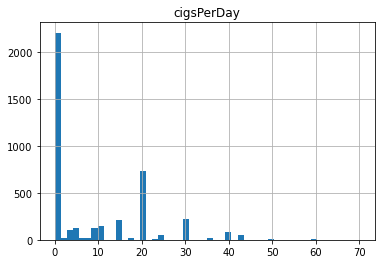

In [108]:
data_x.hist('cigsPerDay', bins=50)

<AxesSubplot:>

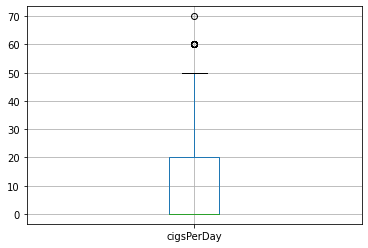

In [109]:
data_x.boxplot('cigsPerDay')

In [110]:
data_x['cigsPerDay'].isna().value_counts()

False    4209
True       29
Name: cigsPerDay, dtype: int64

In [111]:
data_x['cigsPerDay'].describe()

count    4209.000000
mean        9.003089
std        11.920094
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

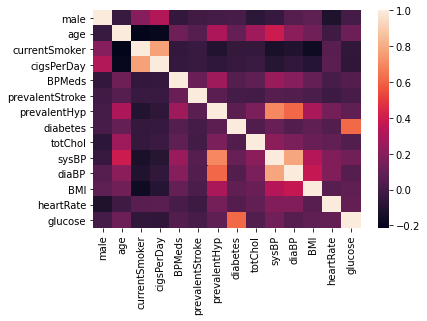

In [113]:
sns.heatmap(data_x.corr())

In [114]:
imputation=data_x['cigsPerDay'].median()
data_x['cigsPerDay']=data_x['cigsPerDay'].fillna(imputation)
data_x['cigsPerDay'].isna().value_counts()

False    4238
Name: cigsPerDay, dtype: int64

array([[<AxesSubplot:title={'center':'BPMeds'}>]], dtype=object)

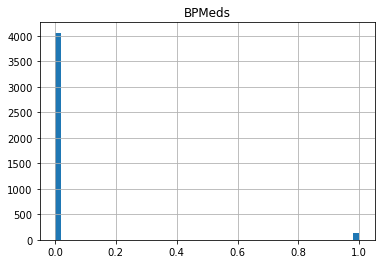

In [115]:
data_x.hist('BPMeds', bins=50)

In [116]:
data_x.BPMeds.isna().value_counts()

False    4185
True       53
Name: BPMeds, dtype: int64

In [117]:
data_x['BPMeds']=data_x['BPMeds'].fillna(0)

In [118]:
data_x.totChol.describe()

count    4188.000000
mean      236.721585
std        44.590334
min       107.000000
25%       206.000000
50%       234.000000
75%       263.000000
max       696.000000
Name: totChol, dtype: float64

array([[<AxesSubplot:title={'center':'totChol'}>]], dtype=object)

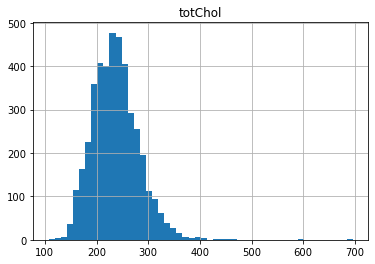

In [119]:
data_x.hist('totChol', bins=50)

<AxesSubplot:>

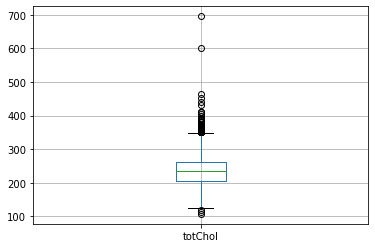

In [120]:
data_x.boxplot('totChol')

In [121]:
data_x.totChol.isna().value_counts()

False    4188
True       50
Name: totChol, dtype: int64

In [122]:
imputation1=data_x['totChol'].median()
data_x['totChol']=data_x['totChol'].fillna(imputation1)
data_x.totChol.isna().value_counts()

False    4238
Name: totChol, dtype: int64

In [123]:
imputation2=data_x['BMI'].median()
data_x['BMI']=data_x['BMI'].fillna(imputation2)
data_x.BMI.isna().value_counts()

False    4238
Name: BMI, dtype: int64

In [124]:
imputation3=data_x['glucose'].median()
data_x['glucose']=data_x['glucose'].fillna(imputation3)
data_x.glucose.isna().value_counts()

False    4238
Name: glucose, dtype: int64

In [125]:
imputation4=data_x['heartRate'].median()
data_x['heartRate']=data_x['heartRate'].fillna(imputation4)
data_x.heartRate.isna().value_counts()
data_x.isna().any()

male               False
age                False
currentSmoker      False
cigsPerDay         False
BPMeds             False
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol            False
sysBP              False
diaBP              False
BMI                False
heartRate          False
glucose            False
dtype: bool

In [126]:
data_x.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


<AxesSubplot:>

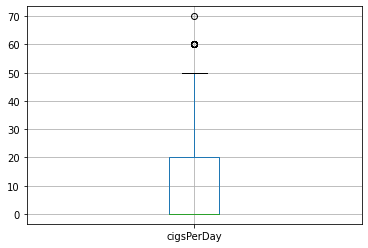

In [127]:
data_x.boxplot('cigsPerDay')

In [128]:
data_x.cigsPerDay.describe()

count    4238.000000
mean        8.941482
std        11.902399
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64

REMOVING OUTLIERS FOR  DIABP
count    4238.000000
mean       82.893464
std        11.910850
min        48.000000
25%        75.000000
50%        82.000000
75%        89.875000
max       142.500000
Name: diaBP, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)
LOWER BOUNDARY: 47 UPPER BOUNDARY 118
extreme lower bridge: 30 extreme upper bridge: 134
AxesSubplot(0.125,0.125;0.775x0.755)
REMOVING OUTLIERS FOR  HEARTRATE
count    4238.000000
mean       75.878716
std        12.025185
min        44.000000
25%        68.000000
50%        75.000000
75%        83.000000
max       143.000000
Name: heartRate, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)
LOWER BOUNDARY: 39 UPPER BOUNDARY 111
extreme lower bridge: 23 extreme upper bridge: 128
AxesSubplot(0.125,0.125;0.775x0.755)
REMOVING OUTLIERS FOR  BMI
count    4238.000000
mean       25.800205
std         4.071041
min        15.540000
25%        23.080000
50%        25.400000
75%        28.037500
max        56.800000
Name: BMI, dtype: flo

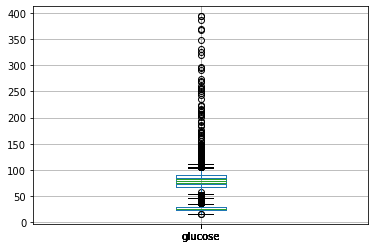

In [129]:
def remove_outliers(feature):
    
    print("REMOVING OUTLIERS FOR ", feature.upper())
    print(data_x[feature].describe())
    print(data_x.boxplot(feature))
    
    upper_boundary=int(data_x[feature].mean()+3*data_x[feature].std())
    lower_boundary=int(data_x[feature].mean()-3*data_x[feature].std())
    print("LOWER BOUNDARY:",lower_boundary,"UPPER BOUNDARY",upper_boundary)
    #EXTREME Outliers cigrs
    IQR=data_x[feature].quantile(0.75)-data_x[feature].quantile(0.25)
    lower_bridge=int(data_x[feature].quantile(0.25)-(IQR*3))
    upper_bridge=int(data_x[feature].quantile(0.75)+(IQR*3))
    print("extreme lower bridge:",lower_bridge,"extreme upper bridge:",upper_bridge)
    data_x.loc[data_x[feature]<=lower_bridge,feature]=lower_bridge
    data_x.loc[data_x[feature]>=upper_bridge,feature]=upper_bridge
    
    print(data_x.boxplot(feature))
    

remove_outliers('diaBP')
remove_outliers('heartRate')
remove_outliers('BMI')
remove_outliers('glucose')

AxesSubplot(0.125,0.125;0.775x0.755)


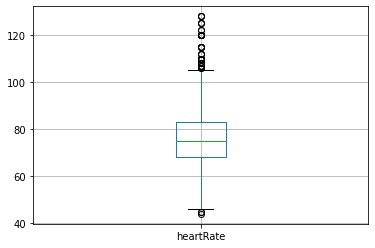

In [130]:
print(data_x.boxplot('heartRate'))

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict


x_train,x_test,y_train,y_test = train_test_split(data_x,data_y,test_size=0.33, random_state=42)

In [132]:


from sklearn.model_selection import GridSearchCV
model=LogisticRegression()
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [10,100, 1000,2500, 5000]
    }
]
clf = GridSearchCV(model, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
op_clf=clf.fit(x_train,y_train)

Fitting 3 folds for each of 2000 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 654 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 1178 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done 1810 tasks      | elapsed:   53.5s
[Parallel(n_jobs=-1)]: Done 2676 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 3800 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 5021 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed:  5.1min finished


In [133]:
op_clf.best_estimator_

LogisticRegression(C=0.00026366508987303583, solver='newton-cg')

In [134]:
prediction=op_clf.predict(x_test)

In [135]:
op_clf.score(x_test,y_test)

0.8570407433881344

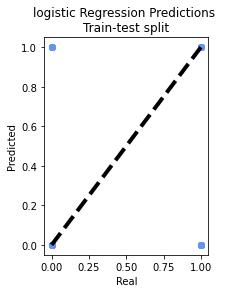

In [136]:
#Predictions plot
plt.figure(figsize=(10,4))

def plot_regression(real, prediction, color, title):
  plt.scatter(real, prediction, color=color)
  plt.plot([real.min(), real.max()], [real.min(), real.max()], 'k--', lw=4)
  plt.xlabel('Real')
  plt.ylabel('Predicted')
  plt.title(title)


#Real price vs train-test predictions plot (without outliers)
plt.subplot(131)
plot_regression(y_test, prediction, 'cornflowerblue', 'logistic Regression Predictions \nTrain-test split')
plt.show()

In [137]:
op_clf.score(x_test,y_test)

0.8570407433881344

In [138]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction)
cm

array([[1189,    5],
       [ 195,   10]], dtype=int64)

D:\DA\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


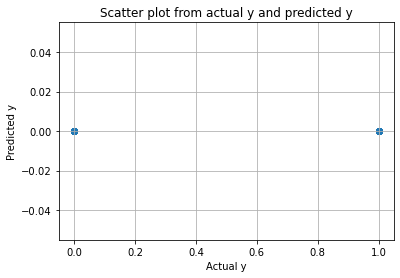

In [139]:
from sklearn.linear_model import SGDClassifier
# SkLearn SGD classifier
n_iter=100
clf_ = SGDClassifier(max_iter=n_iter,loss='log')
clf_.fit(x_train, y_train)
y_pred_sksgd=clf_.predict(x_test)
plt.scatter(y_test,y_pred_sksgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

In [142]:
from sklearn import metrics
clf_.score(x_test,y_pred_sksgd)

1.0